In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Add directory above current directory to path
import sys; sys.path.insert(0, '../..'); sys.path.insert(0, '..')

from functions.miscellanea import _unpickle

In [3]:
data = _unpickle('../data/mmd/mmd_test')

In [4]:
def plot_test(ax,test_vals):
    # a row is an experiment
    test_vals = np.array(test_vals)
    means, stds = test_vals.mean(0), test_vals.std(0)
    _, _, _, gamma_test_thresh = means
    _, _, _, gamma_tt_std = stds
    X = np.arange(0,test_vals.shape[0])
    # plot all test stats against test index
    ax.scatter(X,test_vals[:,2], s=10, color='black')
    ax.plot(X,gamma_test_thresh*np.ones(X.shape), c='r', lw=4)
    ax.fill_between(X,
                    (gamma_test_thresh+2*gamma_tt_std)*np.ones(X.shape),
                    (gamma_test_thresh-2*gamma_tt_std)*np.ones(X.shape),
                    color='r', lw=4, alpha=0.2)

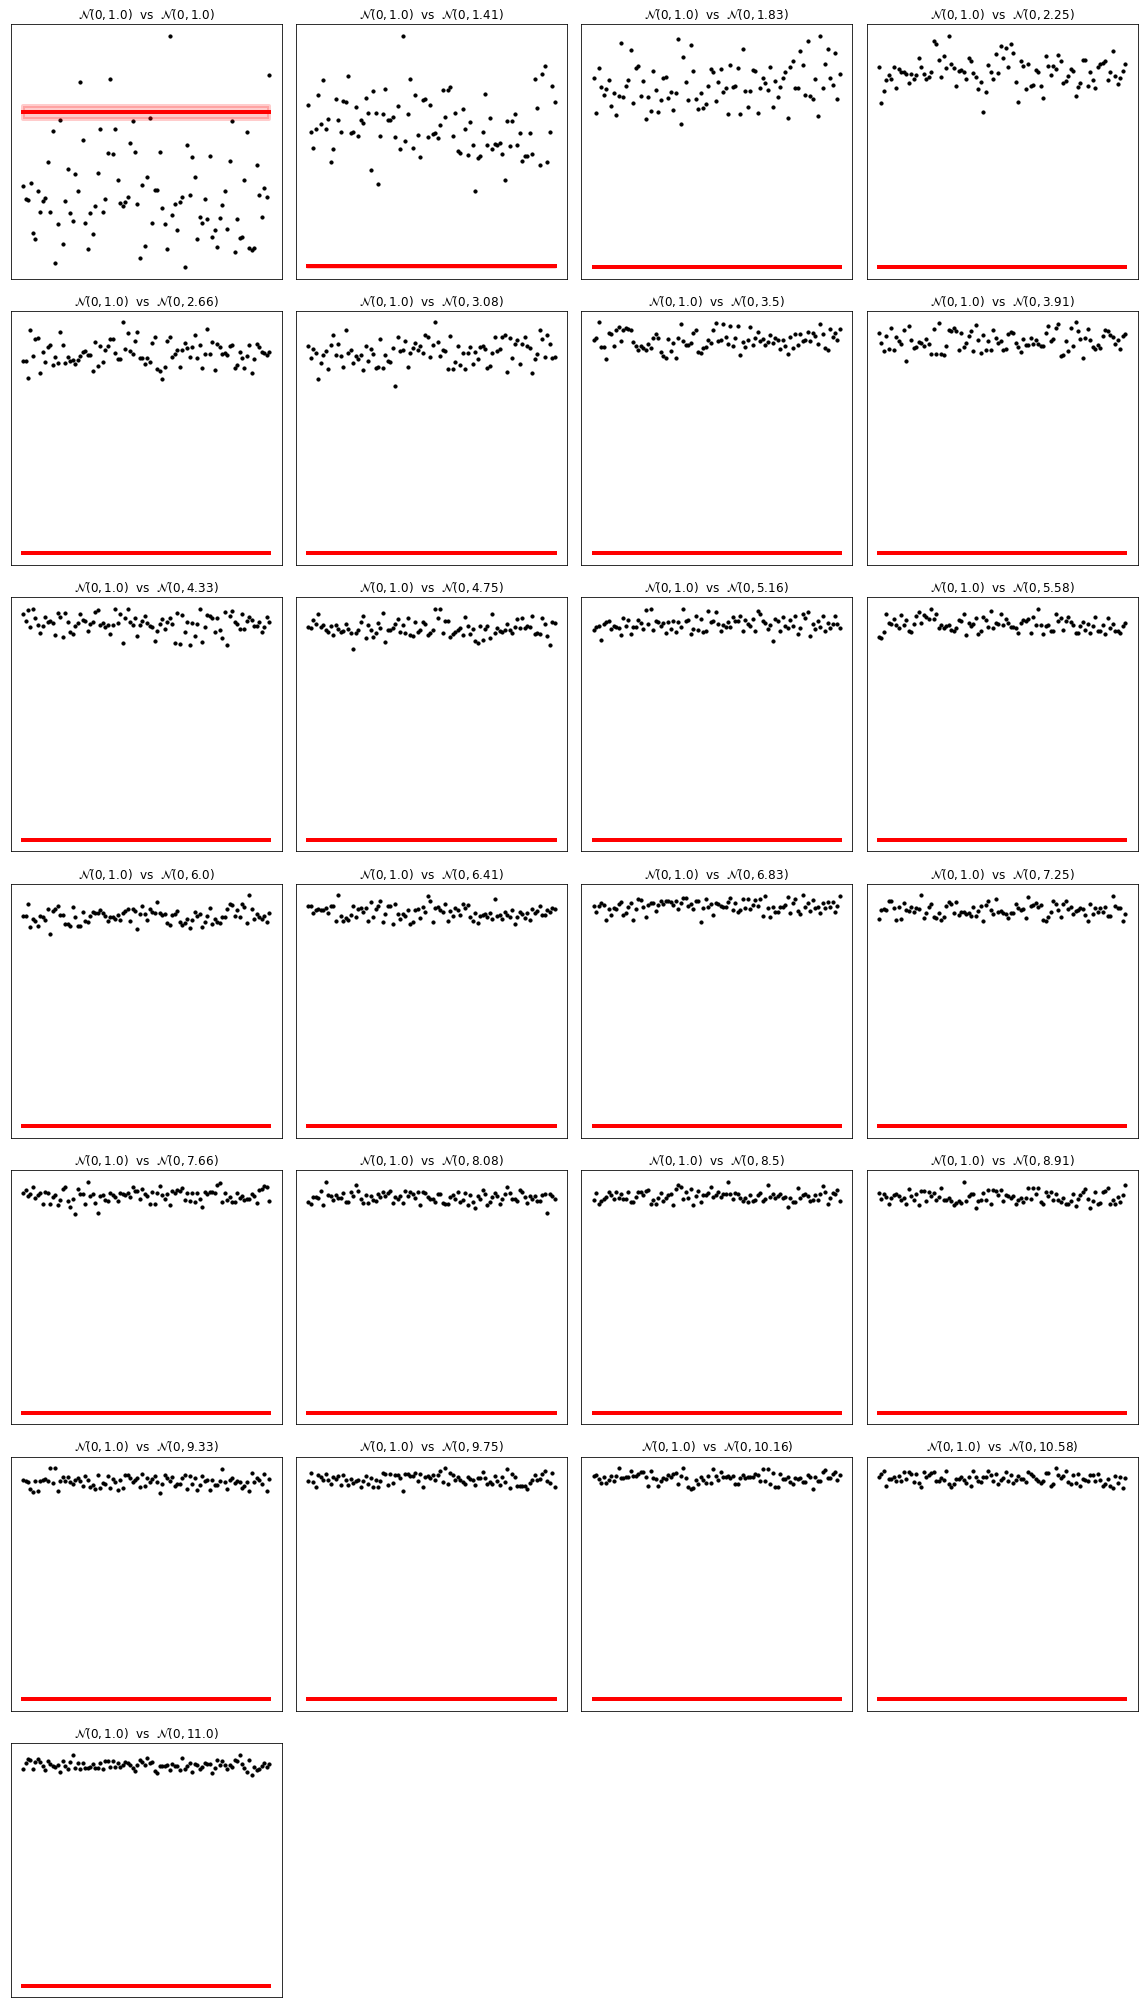

In [5]:
# put 4 graphs per row
num_rows = len(data['params'])//4
num_rows = num_rows+1 if len(data['params'])%4 else num_rows

plt.figure(figsize=(4*4,4*num_rows)) ; k = 1

for i,p in enumerate(data['params']):
    ax = plt.subplot(num_rows,4,k) ; k = k+1

    #add the content to plot
    plot_test(ax,data['test_values'][i])
    mus, sigmas = p[0]
    ax.set_title((r"$\mathcal{N}"+f"({mus[0]},{int(100*sigmas[0])/100})$"\
                  +"  vs  "+r"$\mathcal{N}"+f"({mus[1]},{int(100*sigmas[1])/100})$"))
    #plt.axis([-.1,1.1,-.1,5.5])
    plt.xticks([], []); plt.yticks([], [])
    plt.tight_layout()
    
    
plt.savefig('../data/mmd/mmd_visualize',dpi=400)

## Turn that into a GIF

In [6]:
from functions.miscellanea import _generate_gif

In [7]:
def callback(i,ax,data):
    plot_test(ax,data['test_values'][i])
    mus, sigmas = data['params'][i][0]
    label = (r"$\mathcal{N}"+f"({mus[0]},{int(100*sigmas[0])/100})$"\
                  +"  vs  "+r"$\mathcal{N}"+f"({mus[1]},{int(100*sigmas[1])/100})$")
    
    ax.set_title(label)

../../functions/miscellanea.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize, dpi=dpi)


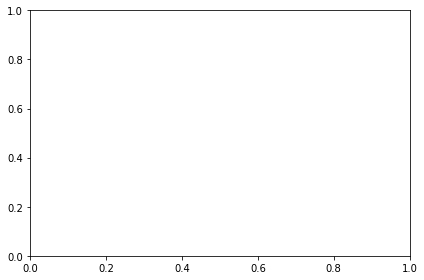

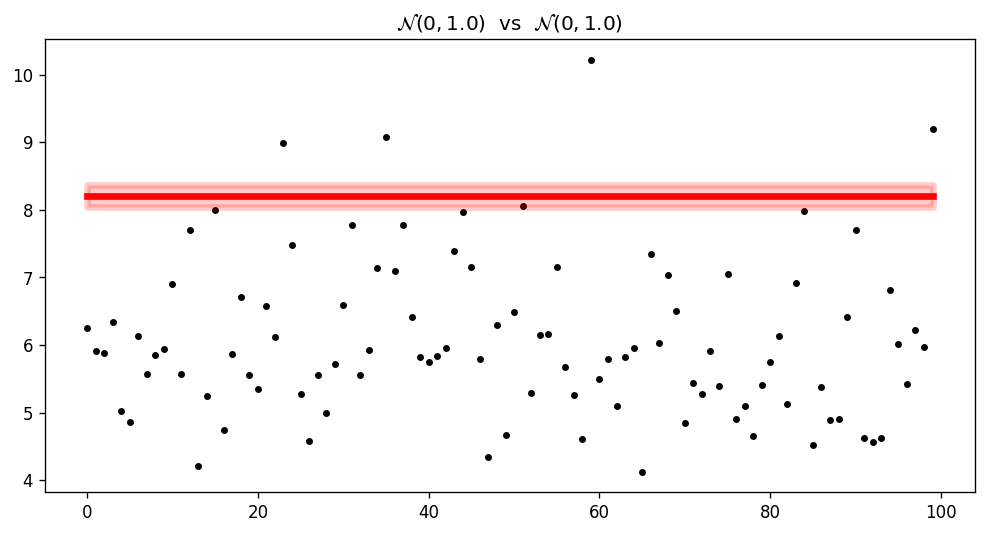

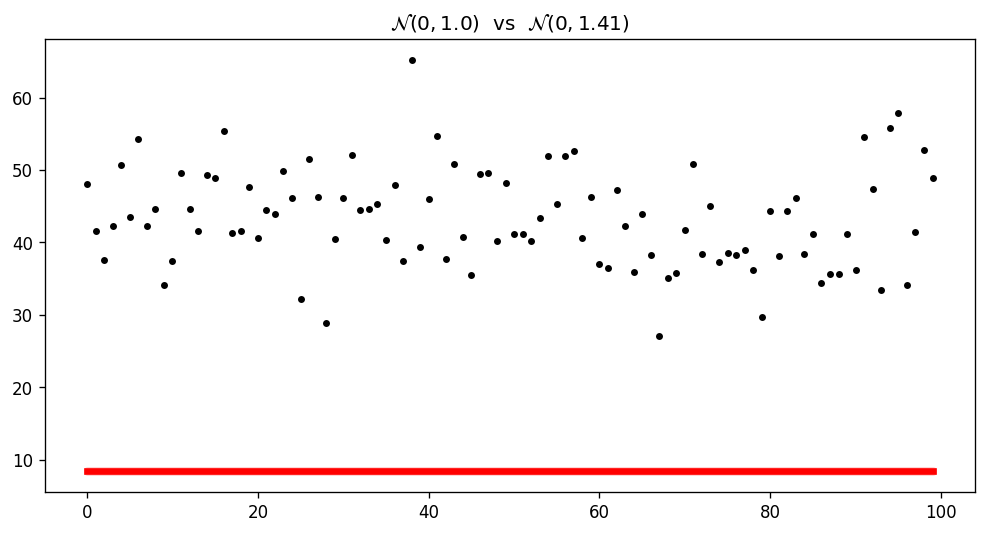

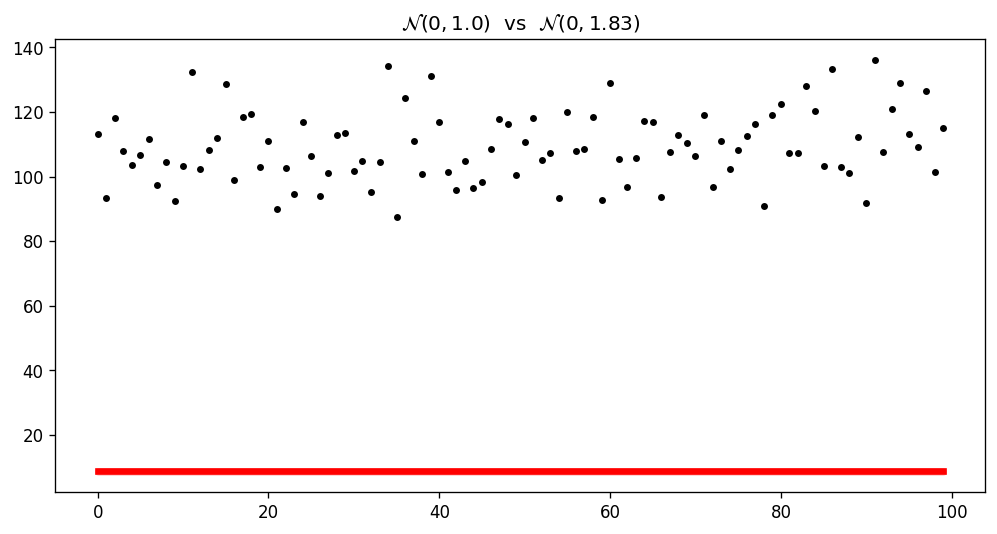

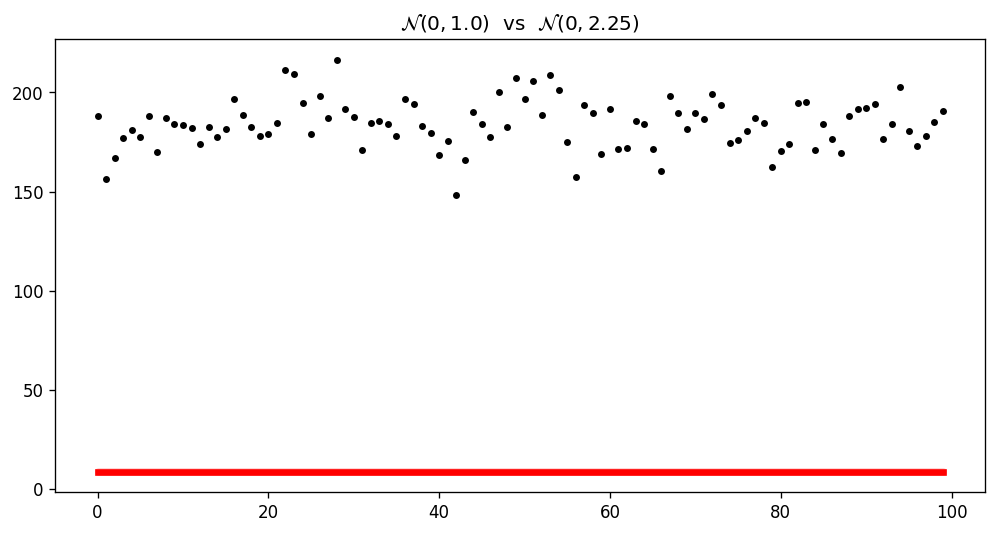

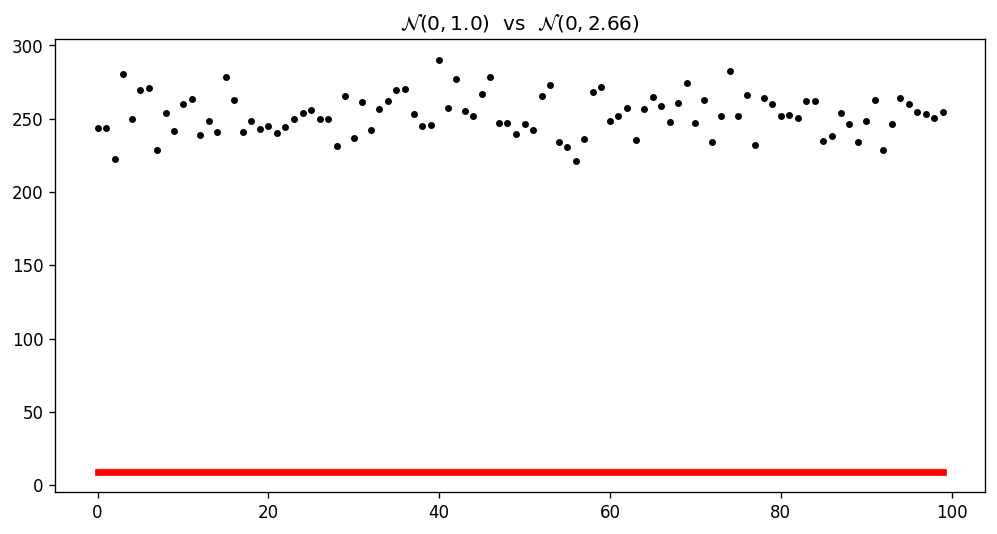

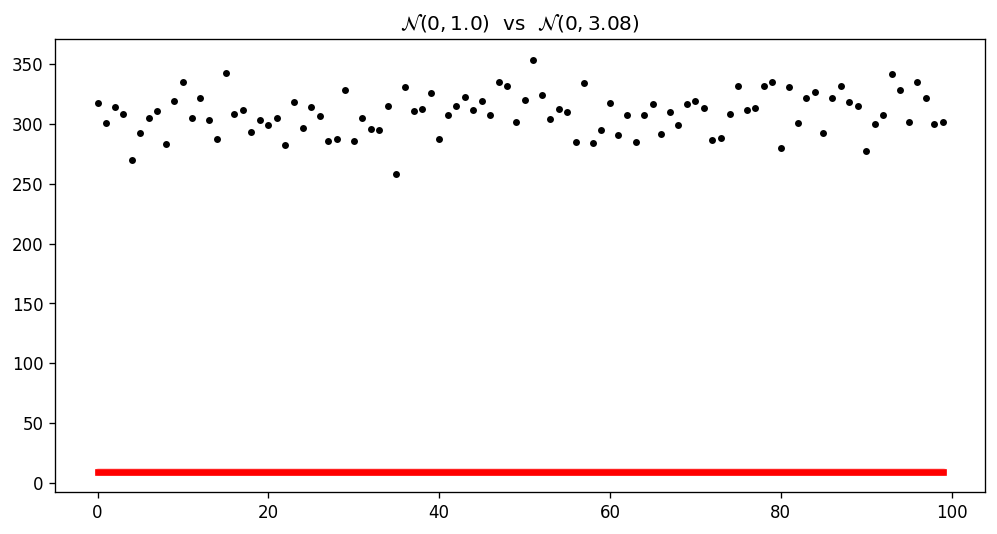

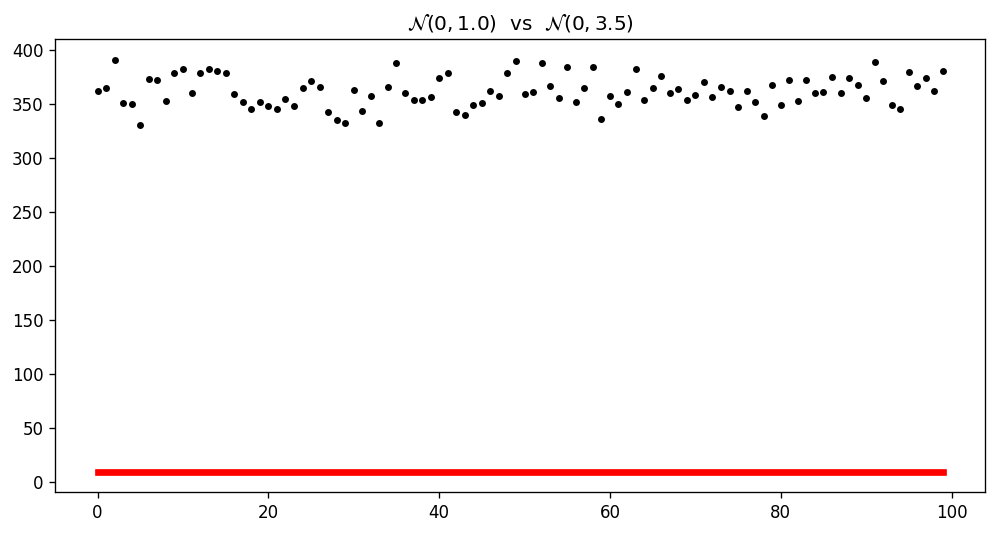

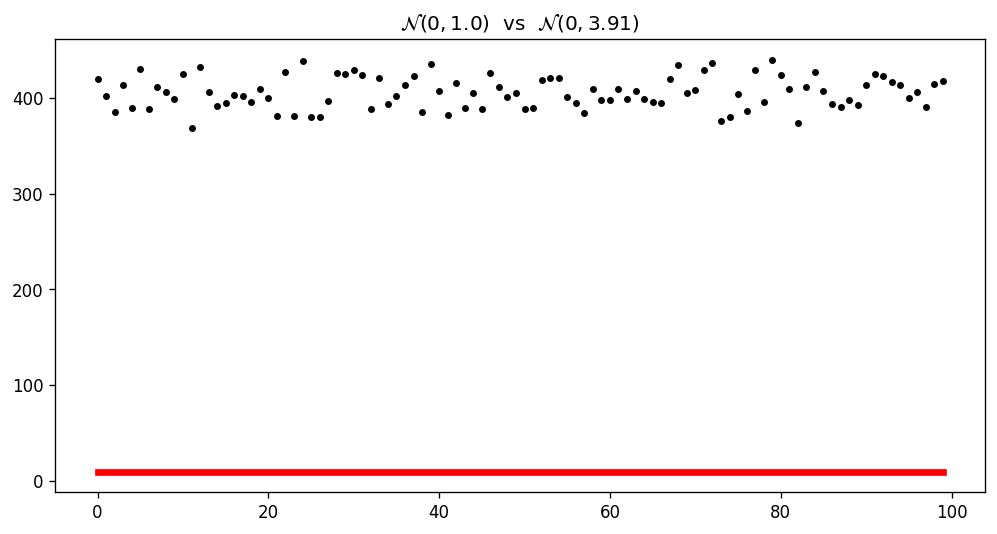

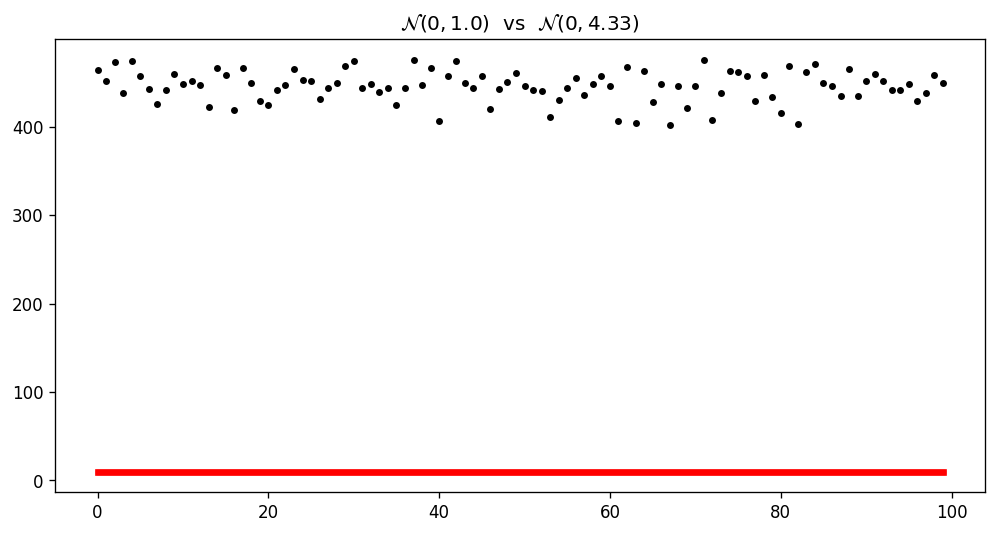

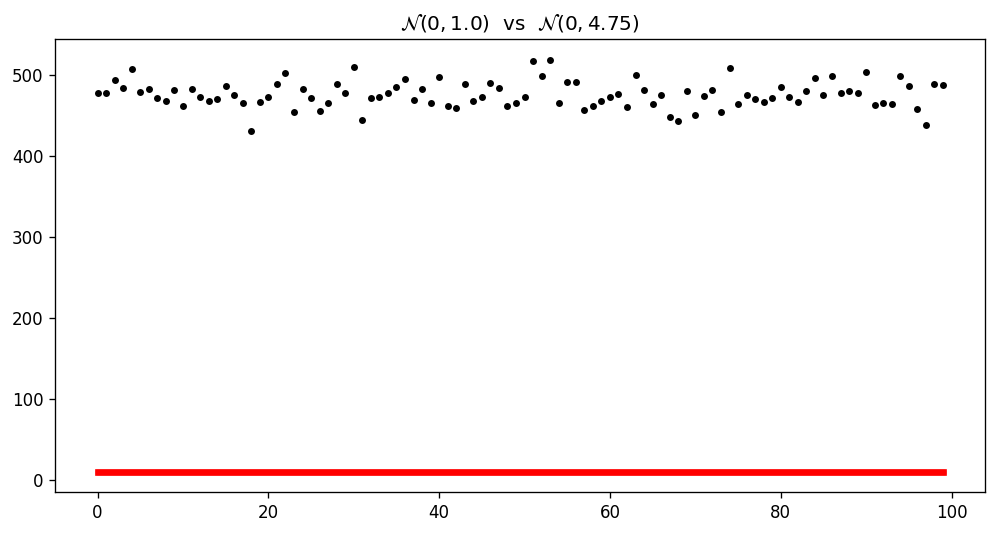

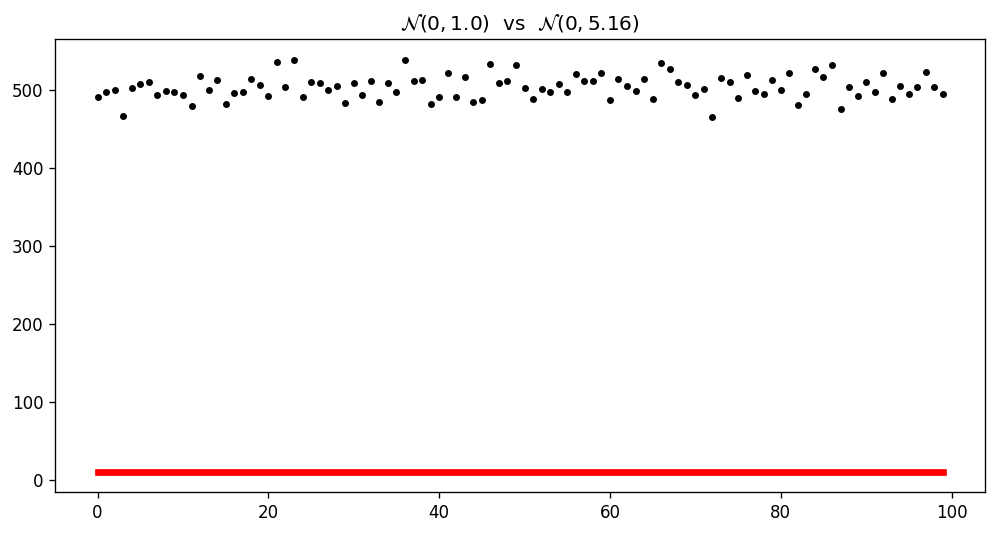

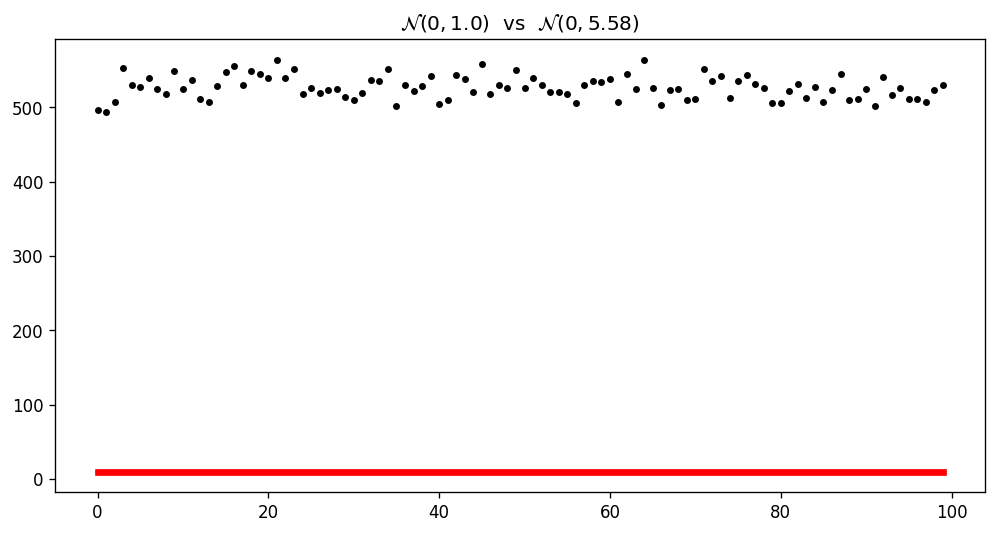

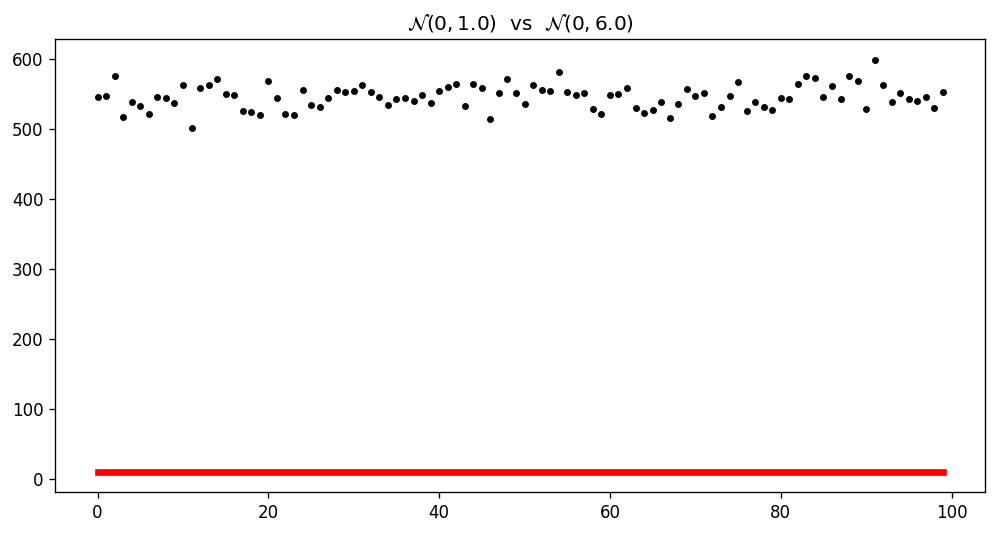

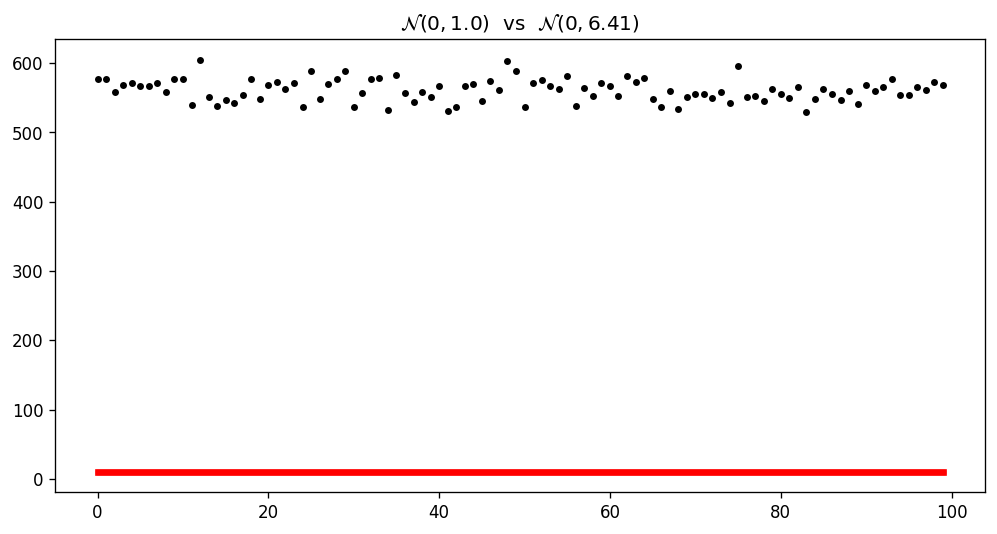

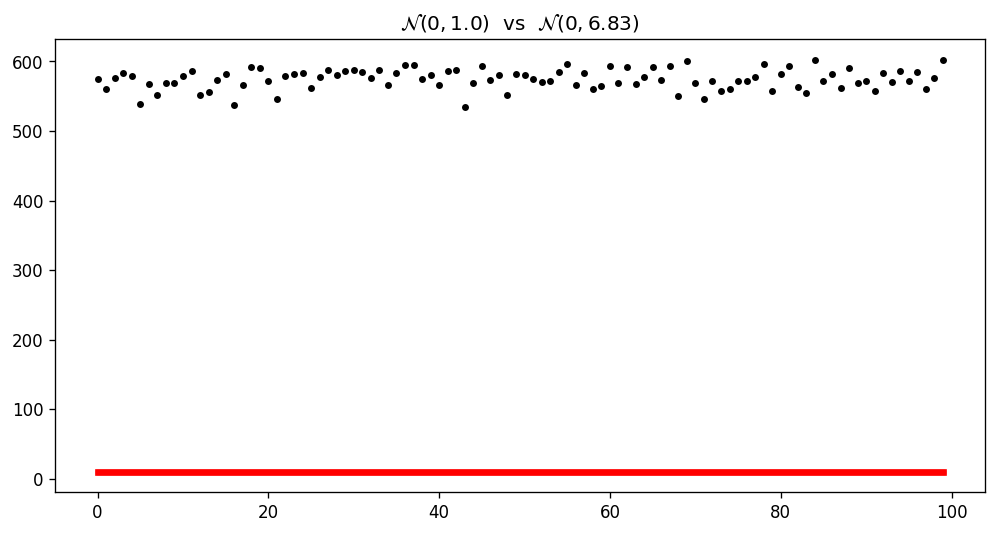

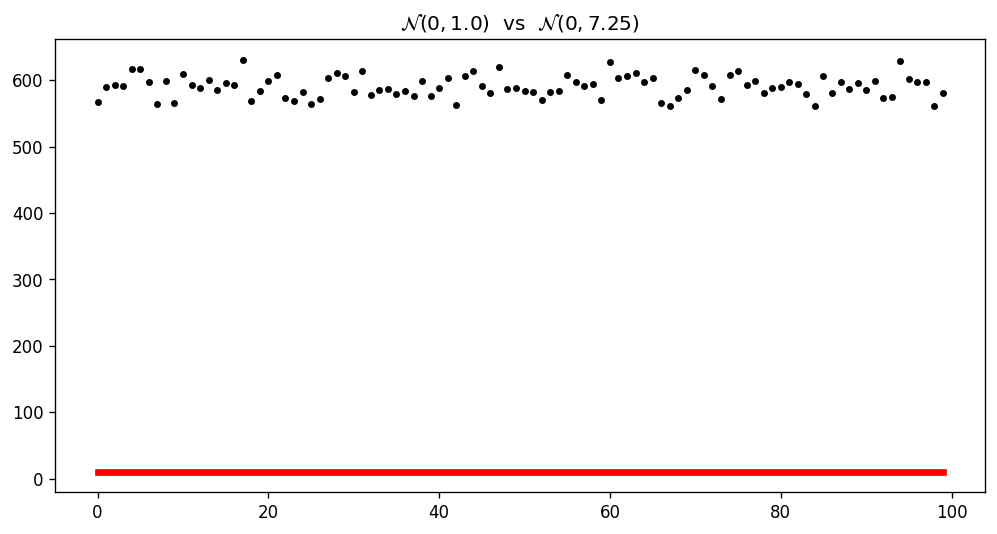

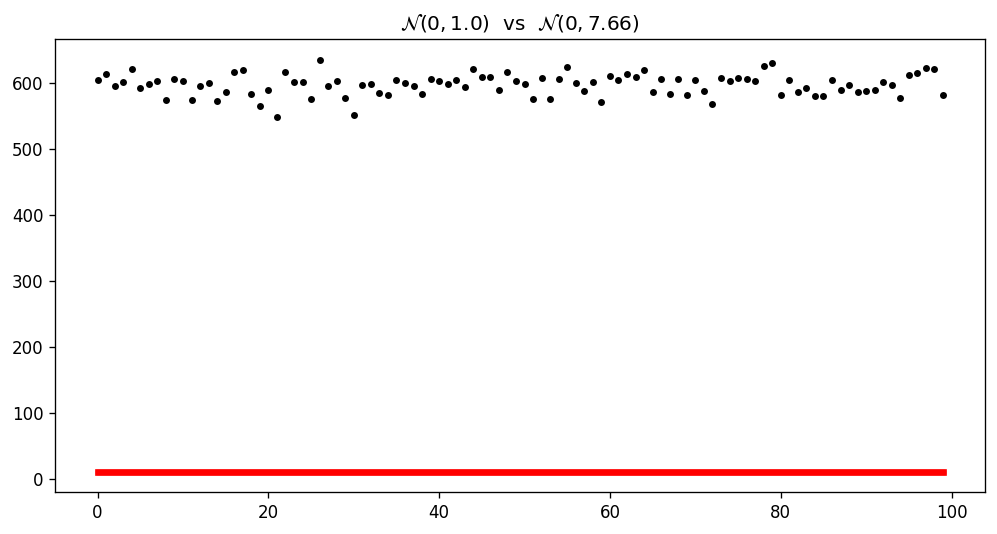

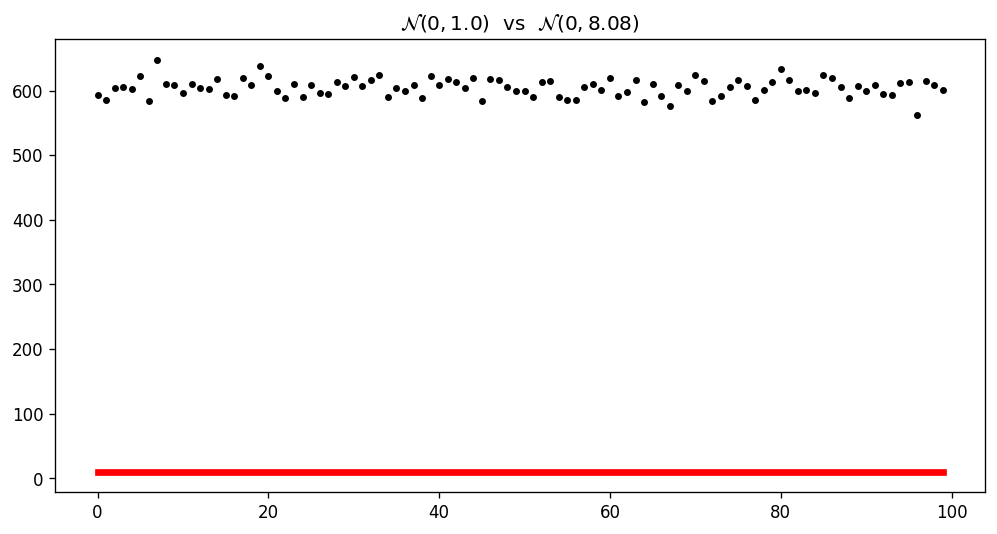

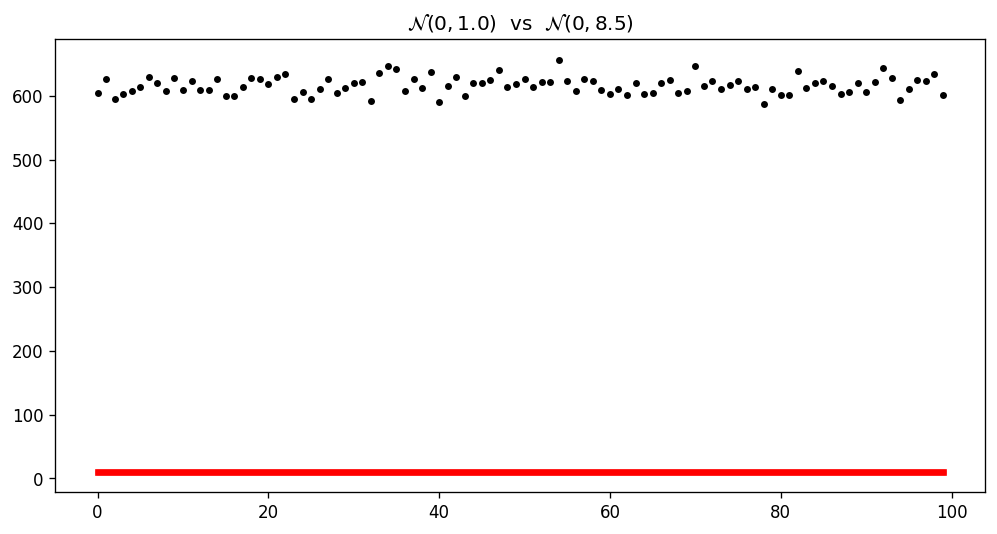

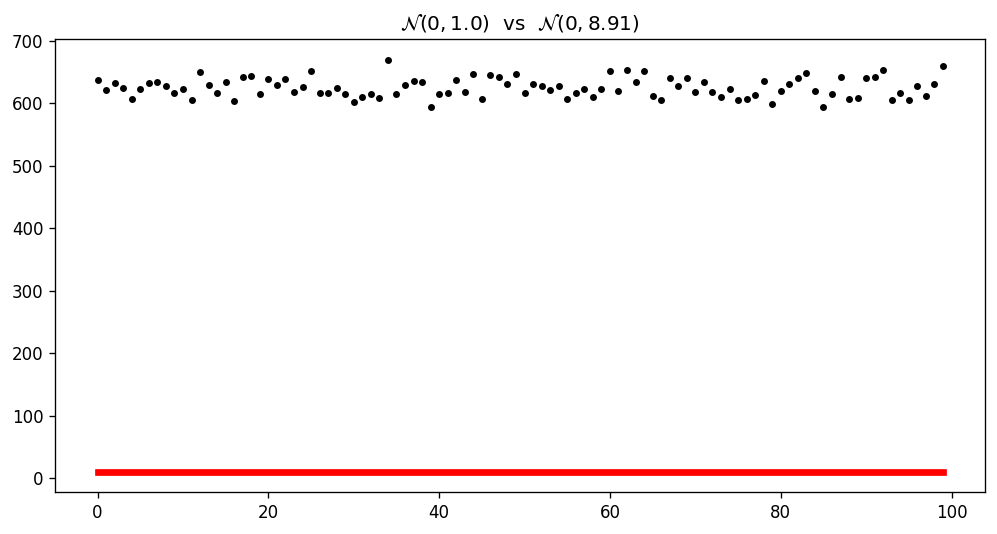

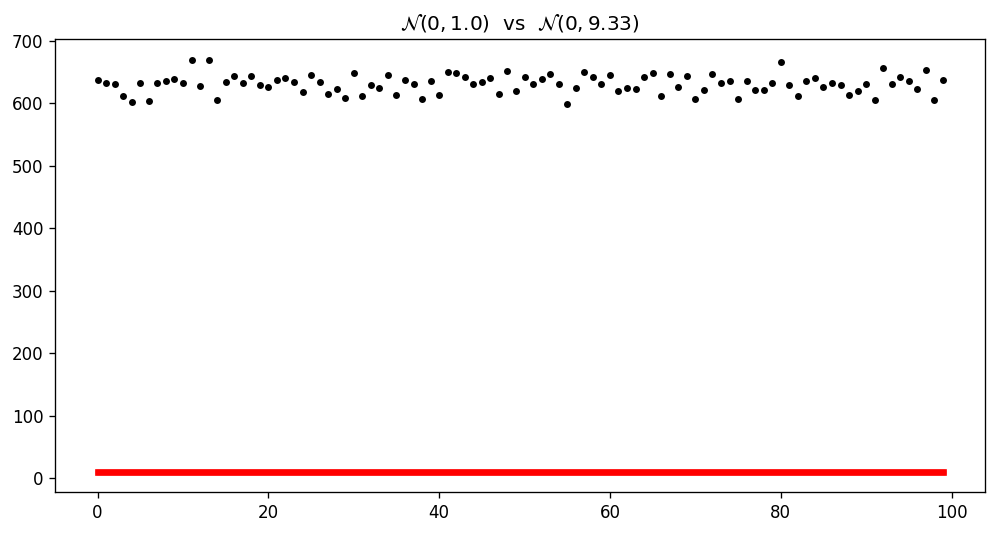

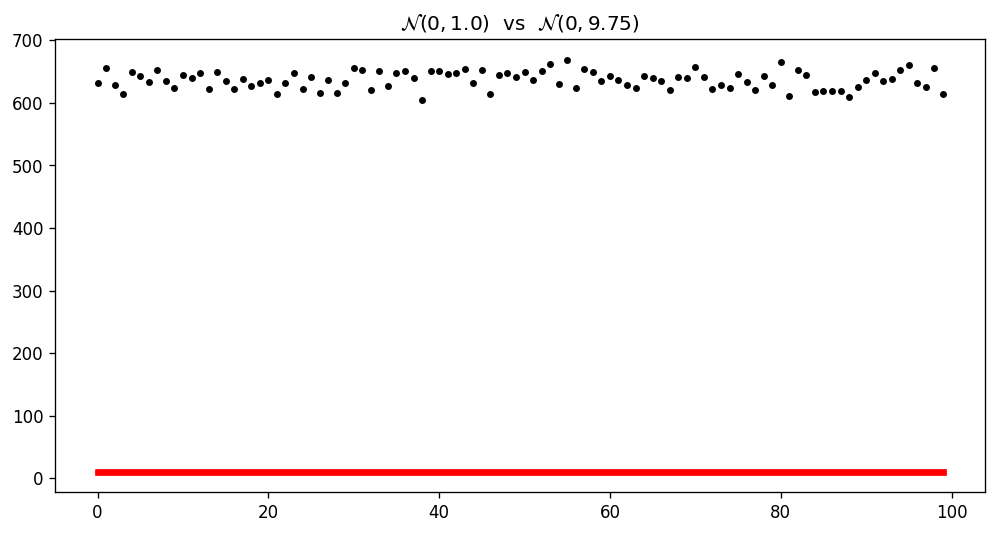

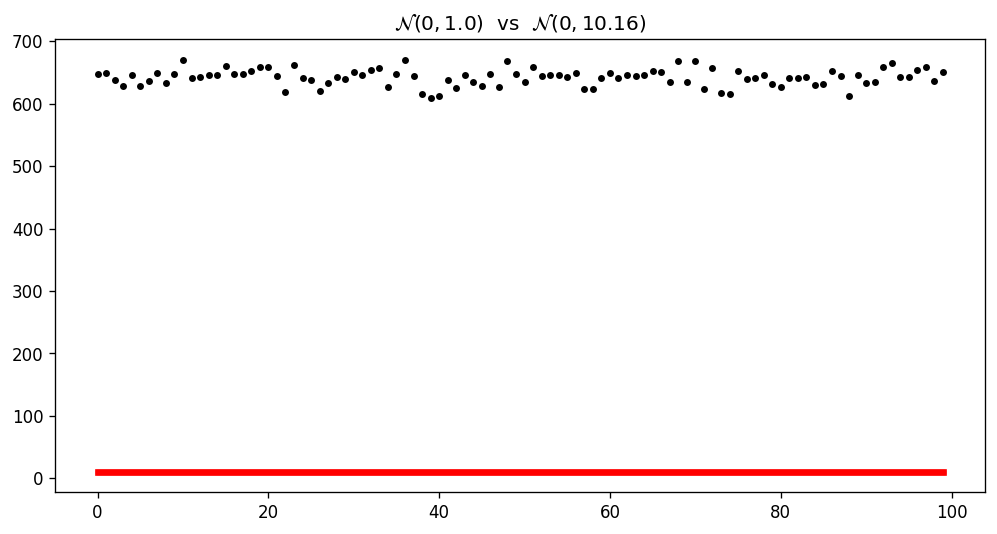

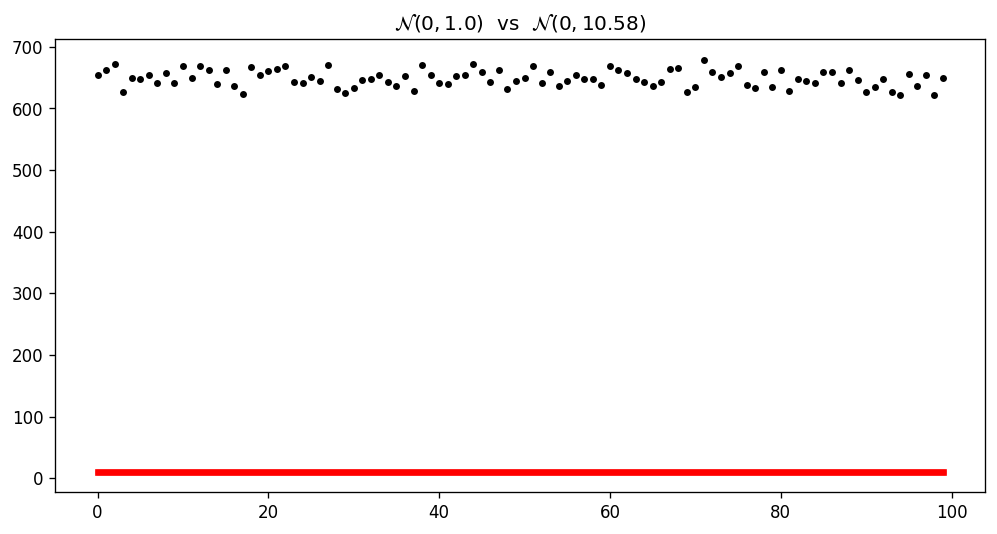

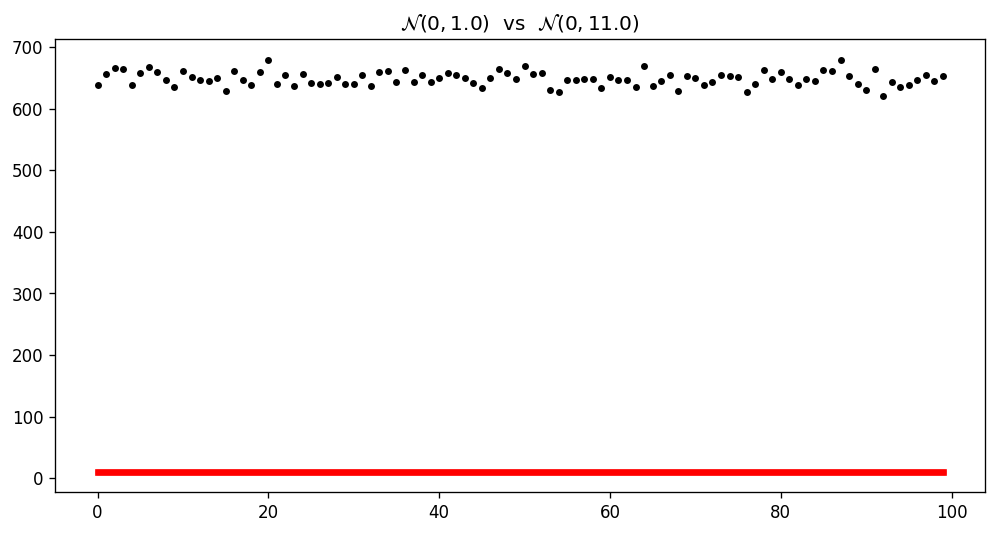

In [8]:
_generate_gif(filepath='../data/mmd/mmd_viz.gif',
              data=data,
              dpi=120,
              callback=callback,
              num_frames=len(data['params']),
              fps=2
             )